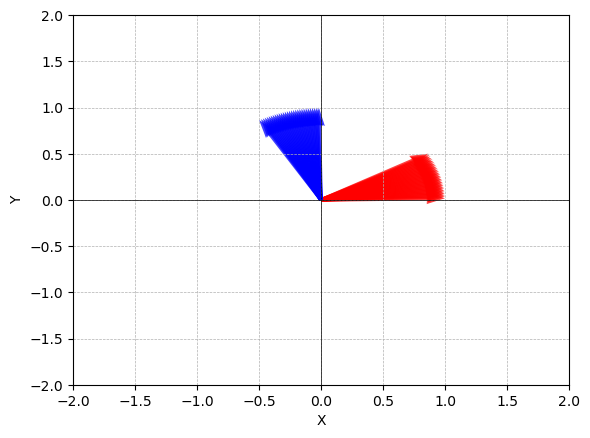

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os


magnitude = 1
angles_amount = 30


f = open("data.txt", "w")
angles_degrees = range(1, angles_amount + 1)

vectors = []
drags = []
lifts = []

for angle_degrees in angles_degrees:
    angle_radians = np.radians(angle_degrees)
    
    x = magnitude * np.cos(angle_radians)
    y = magnitude * np.sin(angle_radians)
    
    vectors.append((x, y))
    drags.append((x,y))
    lifts.append((-y,x))

    row = "(" + str(x) + " "+  str(y) + " 0);\t(" + str(-y) + " " + str(x) + " 0);\n"
    f.write(row)
    
f.close()


origin = np.zeros((2, len(vectors)))

plt.quiver(*origin, [v[0] for v in vectors], [v[1] for v in vectors],
           angles='xy', scale_units='xy', scale=1, color='r', alpha=0.75)


plt.quiver(*origin, [v[0] for v in lifts], [v[1] for v in lifts],
           angles='xy', scale_units='xy', scale=1, color='b', alpha=0.75)


plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [14]:
import pandas as pd

all_test_folders = os.listdir("./AIRFOIL_TESTS/")
all_test_folders.remove(".DS_Store")
alltests_names = []

last_test_num = 0
last_test_index = 0
for i in range(0, len(all_test_folders), 1):
    test_name = all_test_folders[i].split('_')[0]
    test_num = test_name.replace("TESTS", "")
    test_num = int(test_num)

    if(test_num > last_test_num):
        last_test_num = test_num
        last_test_index = i


def avg_cl_cd(cl, cd):

    length = len(cl)
    split = 0
    cl_avg = 0
    cd_avg = 0

    if(length%2 ==0):
        split = int(len(cl)//2)
    else:
        split = int((len(cl)-1)//2)

    for i in range(split, len(cl), 1):
        cl_avg += cl[i]
        cd_avg += cd[i]
    
    cl_avg /= (length - split)
    cd_avg /= (length - split)

    return cl_avg, cd_avg

def last_cl_cd(cl, cd):
    return cl[len(cl)-1], cd[len(cd)-1]

def get_cl_cd(test_name_path = ""):

    cl = []
    cd = []

    if(test_name_path == ""):
        current_tests_fodler = "./AIRFOIL_TESTS/" + all_test_folders[last_test_index] + "/"
    
    curr_test_index = 0
    while(1):
        filename_path = current_tests_fodler + "TEST_CASE" + str(curr_test_index) + ".dat"
        curr_test_index +=1
        
        if(os.path.exists(filename_path)):
            data = pd.read_csv(filename_path, delim_whitespace=True, header=None, skiprows=13)

            cl_all = data.iloc[:, 4].values
            cd_all = data.iloc[:, 1].values
            
            
            cl_avg, cd_avg = avg_cl_cd(cl_all, cd_all)
            cl.append(cl_avg)
            cd.append(cd_avg)
            
        else:
            break


    return cl, cd


cl, cd = get_cl_cd()
angles = np.arange(1, 31)
fig = go.Figure()

fig.add_scatter(x=angles, y=cl, name='Cl' )
fig.add_scatter(x=angles, y=cd, name='Cd')
fig.update_layout(xaxis_title="Angle")


LD = []
for i in range(0, len(cl), 1):
    LD.append(cl[i]/cd[i])

fig.show()



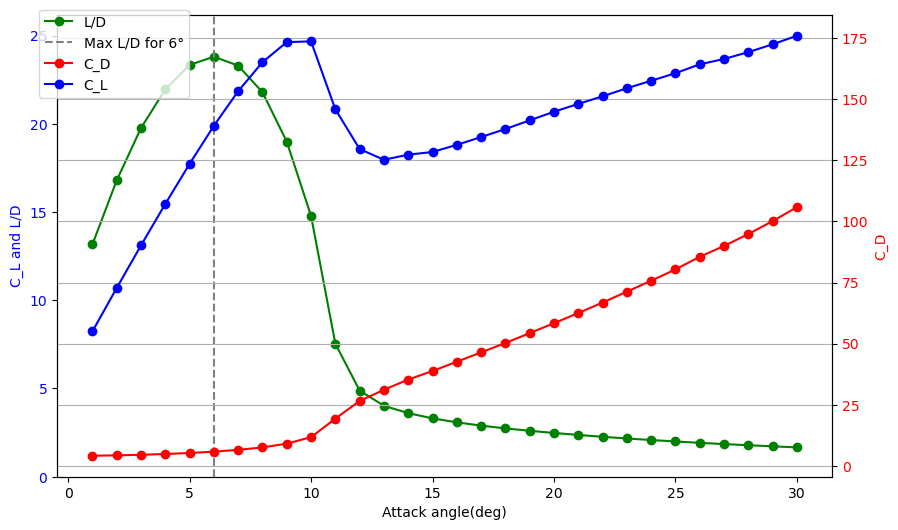

In [13]:



C_L = cl

C_D = cd

ratio_LD = LD

max_ratio_index = np.argmax(ratio_LD)
max_ratio_value = ratio_LD[max_ratio_index]
max_ratio_angle = angles[max_ratio_index]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(angles, ratio_LD, 'g-o', label='L/D')
ax1.set_xlabel('Attack angle(deg)')
ax1.set_ylabel('C_L and L/D', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.axvline(max_ratio_angle, color='gray', linestyle='--', label=f'Max L/D for {max_ratio_angle}°')
ax1.set_ylim(0, max(ratio_LD) * 1.1) 


ax2 = ax1.twinx()
ax2.plot(angles, C_D, 'r-o', label='C_D')
ax2.plot(angles, C_L, 'b-o', label='C_L')
ax2.set_ylabel('C_D', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.grid(True)
plt.show()


